<a href="https://colab.research.google.com/github/munj1/gan-test/blob/main/test_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/test"
!kaggle datasets download -d jessicali9530/celeba-dataset

celeba-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q celeba-dataset.zip -d .

In [ ]:
# Pillow library (image preprocessing)
from PIL import Image
import os
import numpy as np

paths = os.listdir('/content/img_align_celeba/img_align_celeba')
images = []

# 편의상 흑백으로 전처리 (크롭(여백제거) -> 흑백 -> 리사이징)
for path in paths[0:50000]:
  parsed_image = Image.open('/content/img_align_celeba/img_align_celeba/' + path).crop((20, 30, 160, 180)).convert('L').resize((64,64))
  images.append( np.array(parsed_image) )

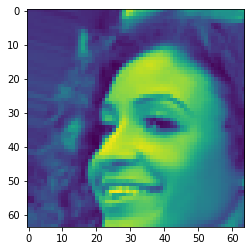

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[1])
plt.show()

In [ ]:
images = np.array(images)
images = np.divide(images, 255) # 0~1 사이값 으로 전처리
images = images.reshape( 50000, 64, 64, 1) # conv2D 에 넣기위해서는 4dimension 여야함

In [ ]:
# print(images[0])
print(images.shape)

(50000, 64, 64, 1)


In [ ]:
# Discriminator

import tensorflow as tf

discriminator = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=[64,64,1]), #이미지 분석
  tf.keras.layers.LeakyReLU(alpha=0.2), #activation을 leakyrelu 사용한거임
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Conv2D(64, (3,3), strides=(2, 2), padding='same'),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

discriminator.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        640       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 32, 32, 64)        0         
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 16, 16, 64)        0         
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 16384)            

In [ ]:
generator = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4 * 4 * 256, input_shape=(100,) ), #랜덤숫자 100개 입력값으로 받자  -> 64,64,1로 뱉자
    tf.keras.layers.Reshape((4, 4, 256)),
    tf.keras.layers.Conv2DTranspose(256, 3, strides=2, padding='same'), #특성을 추출하면서 이미지를 키우자
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2DTranspose(128, 3, strides=2, padding='same'),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2DTranspose(64, 3, strides=2, padding='same'),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2DTranspose(1, 3, strides=2, padding='same', activation='sigmoid')
    ])

In [ ]:
generator.summary() #마지막 레이어가 어떻게 나오는지 파악해야지

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 4096)              413696    
                                                                 
 reshape_3 (Reshape)         (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose_12 (Conv2D  (None, 8, 8, 256)        590080    
 Transpose)                                                      
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 8, 8, 256)         0         
                                                                 
 batch_normalization_9 (Batc  (None, 8, 8, 256)        1024      
 hNormalization)                                                 
                                                                 
 conv2d_transpose_13 (Conv2D  (None, 16, 16, 128)     

In [ ]:
GAN = tf.keras.models.Sequential([generator, discriminator])

discriminator.compile(optimizer='adam',loss='binary_crossentropy')
#단독으로는 트레이닝 가능
discriminator.trainable = False
#GAN 에서는 discriminator는 학습 안됨

GAN.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
GAN.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 64, 64, 1)         1374977   
                                                                 
 sequential_8 (Sequential)   (None, 1)                 53953     
                                                                 
Total params: 1,428,930
Trainable params: 1,374,081
Non-trainable params: 54,849
_________________________________________________________________


epoch: 0
1/1 [==============================] - 0s 34ms/step


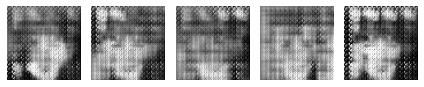

4/4 [==============================] - 0s 2ms/step
epoch: 1
1/1 [==============================] - 0s 16ms/step


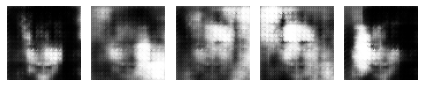

4/4 [==============================] - 0s 2ms/step
epoch: 2
1/1 [==============================] - 0s 16ms/step


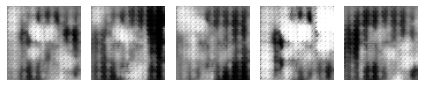

4/4 [==============================] - 0s 2ms/step
epoch: 3
1/1 [==============================] - 0s 16ms/step


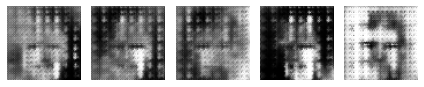

4/4 [==============================] - 0s 2ms/step
epoch: 4
1/1 [==============================] - 0s 15ms/step


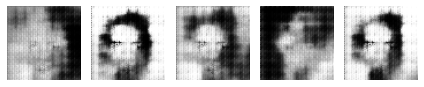

4/4 [==============================] - 0s 2ms/step
epoch: 5
1/1 [==============================] - 0s 16ms/step


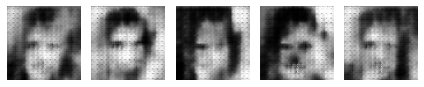

4/4 [==============================] - 0s 2ms/step
epoch: 6
1/1 [==============================] - 0s 15ms/step


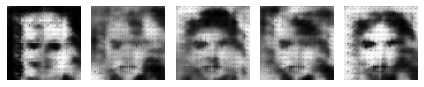

4/4 [==============================] - 0s 2ms/step
epoch: 7
1/1 [==============================] - 0s 17ms/step


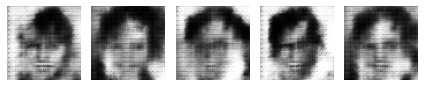

4/4 [==============================] - 0s 2ms/step
epoch: 8
1/1 [==============================] - 0s 16ms/step


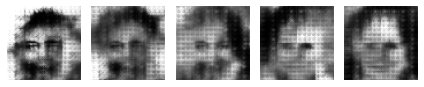

4/4 [==============================] - 0s 2ms/step
epoch: 9
1/1 [==============================] - 0s 16ms/step


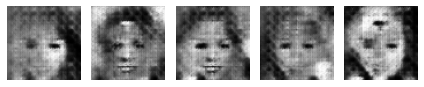

4/4 [==============================] - 0s 2ms/step
epoch: 10
1/1 [==============================] - 0s 16ms/step


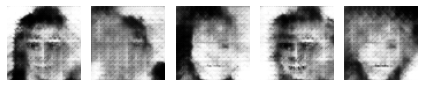

4/4 [==============================] - 0s 2ms/step
epoch: 11
1/1 [==============================] - 0s 17ms/step


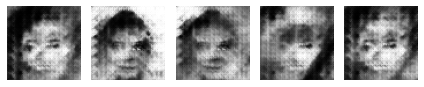

4/4 [==============================] - 0s 2ms/step
epoch: 12
1/1 [==============================] - 0s 17ms/step


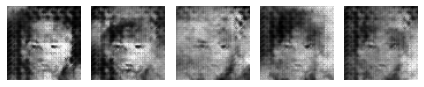

4/4 [==============================] - 0s 2ms/step
epoch: 13
1/1 [==============================] - 0s 16ms/step


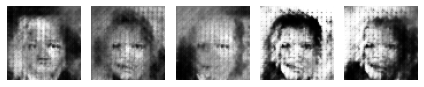

4/4 [==============================] - 0s 2ms/step
epoch: 14
1/1 [==============================] - 0s 16ms/step


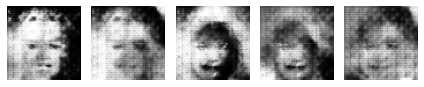

4/4 [==============================] - 0s 2ms/step
epoch: 15
1/1 [==============================] - 0s 17ms/step


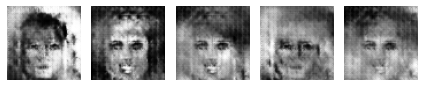

4/4 [==============================] - 0s 3ms/step
epoch: 16
1/1 [==============================] - 0s 16ms/step


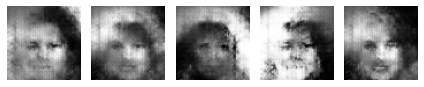

4/4 [==============================] - 0s 2ms/step
epoch: 17
1/1 [==============================] - 0s 17ms/step


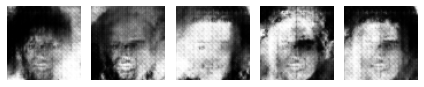

4/4 [==============================] - 0s 2ms/step
epoch: 18
1/1 [==============================] - 0s 16ms/step


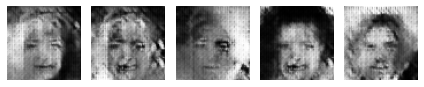

4/4 [==============================] - 0s 2ms/step
epoch: 19
1/1 [==============================] - 0s 17ms/step


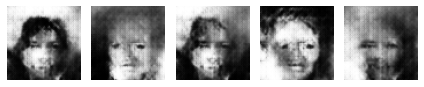

4/4 [==============================] - 0s 2ms/step
epoch: 20
1/1 [==============================] - 0s 17ms/step


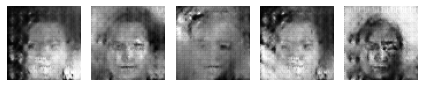

4/4 [==============================] - 0s 2ms/step
epoch: 21
1/1 [==============================] - 0s 16ms/step


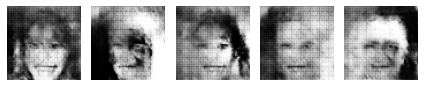

4/4 [==============================] - 0s 2ms/step
epoch: 22
1/1 [==============================] - 0s 17ms/step


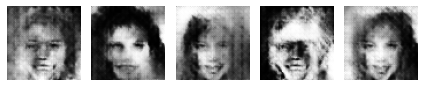

4/4 [==============================] - 0s 3ms/step
epoch: 23
1/1 [==============================] - 0s 17ms/step


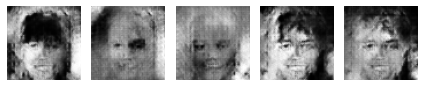

4/4 [==============================] - 0s 2ms/step
epoch: 24
1/1 [==============================] - 0s 16ms/step


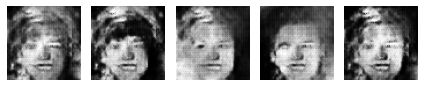

4/4 [==============================] - 0s 2ms/step
epoch: 25
1/1 [==============================] - 0s 17ms/step


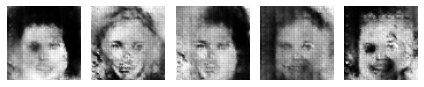

4/4 [==============================] - 0s 2ms/step
epoch: 26
1/1 [==============================] - 0s 17ms/step


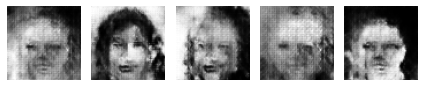

4/4 [==============================] - 0s 2ms/step
epoch: 27
1/1 [==============================] - 0s 16ms/step


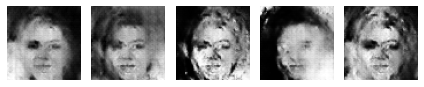

4/4 [==============================] - 0s 3ms/step
epoch: 28
1/1 [==============================] - 0s 16ms/step


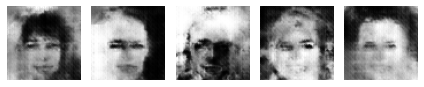

4/4 [==============================] - 0s 2ms/step
epoch: 29
1/1 [==============================] - 0s 16ms/step


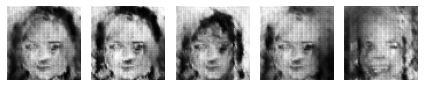

4/4 [==============================] - 0s 2ms/step
epoch: 30
1/1 [==============================] - 0s 16ms/step


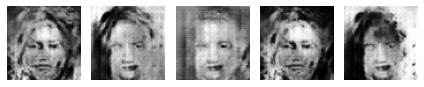

4/4 [==============================] - 0s 3ms/step
epoch: 31
1/1 [==============================] - 0s 17ms/step


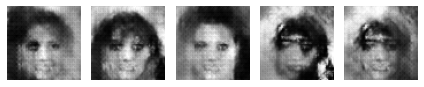

4/4 [==============================] - 0s 2ms/step
epoch: 32
1/1 [==============================] - 0s 16ms/step


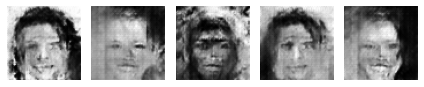

4/4 [==============================] - 0s 2ms/step
epoch: 33
1/1 [==============================] - 0s 17ms/step


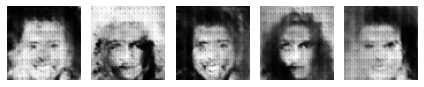

4/4 [==============================] - 0s 2ms/step
epoch: 34
1/1 [==============================] - 0s 16ms/step


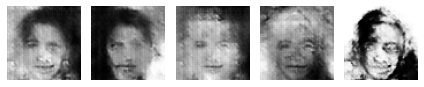

4/4 [==============================] - 0s 3ms/step
epoch: 35
1/1 [==============================] - 0s 17ms/step


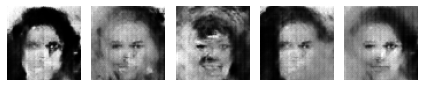

4/4 [==============================] - 0s 2ms/step
epoch: 36
1/1 [==============================] - 0s 16ms/step


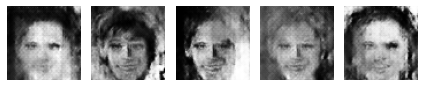

4/4 [==============================] - 0s 2ms/step
epoch: 37
1/1 [==============================] - 0s 17ms/step


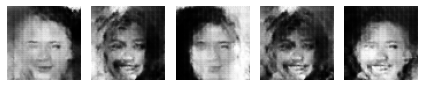

4/4 [==============================] - 0s 3ms/step
epoch: 38
1/1 [==============================] - 0s 16ms/step


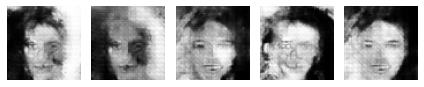

4/4 [==============================] - 0s 2ms/step
epoch: 39
1/1 [==============================] - 0s 16ms/step


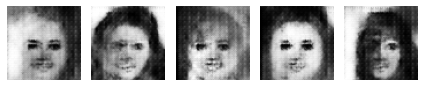

4/4 [==============================] - 0s 2ms/step
epoch: 40
1/1 [==============================] - 0s 17ms/step


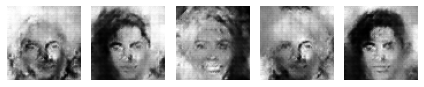

4/4 [==============================] - 0s 2ms/step
epoch: 41
1/1 [==============================] - 0s 16ms/step


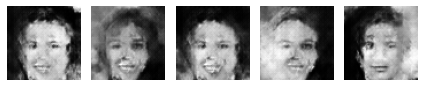

4/4 [==============================] - 0s 2ms/step
epoch: 42
1/1 [==============================] - 0s 17ms/step


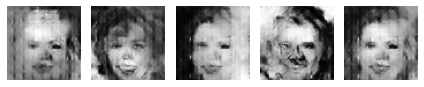

4/4 [==============================] - 0s 2ms/step
epoch: 43
1/1 [==============================] - 0s 18ms/step


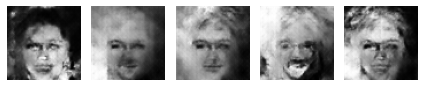

4/4 [==============================] - 0s 2ms/step
epoch: 44
1/1 [==============================] - 0s 17ms/step


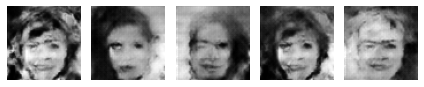

4/4 [==============================] - 0s 2ms/step
epoch: 45
1/1 [==============================] - 0s 17ms/step


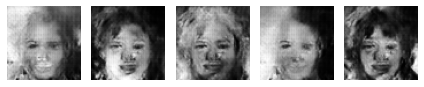

4/4 [==============================] - 0s 2ms/step
epoch: 46
1/1 [==============================] - 0s 18ms/step


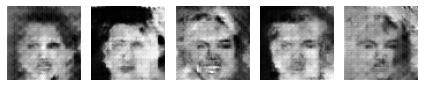

4/4 [==============================] - 0s 2ms/step
epoch: 47
1/1 [==============================] - 0s 17ms/step


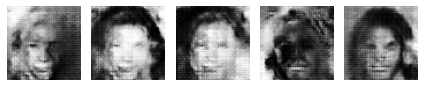

4/4 [==============================] - 0s 3ms/step
epoch: 48
1/1 [==============================] - 0s 16ms/step


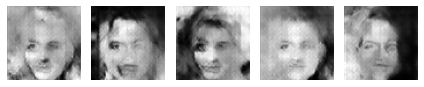

4/4 [==============================] - 0s 2ms/step
epoch: 49
1/1 [==============================] - 0s 18ms/step


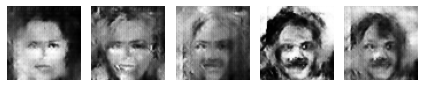

4/4 [==============================] - 0s 2ms/step
epoch: 50
1/1 [==============================] - 0s 17ms/step


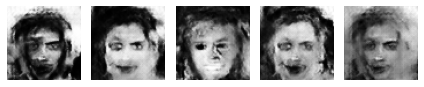

4/4 [==============================] - 0s 3ms/step
epoch: 51
1/1 [==============================] - 0s 17ms/step


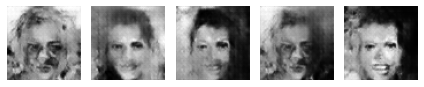

4/4 [==============================] - 0s 3ms/step
epoch: 52
1/1 [==============================] - 0s 17ms/step


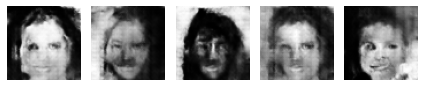

4/4 [==============================] - 0s 3ms/step
epoch: 53
1/1 [==============================] - 0s 18ms/step


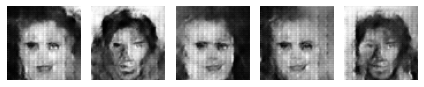

4/4 [==============================] - 0s 3ms/step
epoch: 54
1/1 [==============================] - 0s 17ms/step


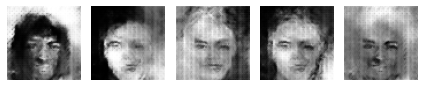

4/4 [==============================] - 0s 2ms/step
epoch: 55
1/1 [==============================] - 0s 17ms/step


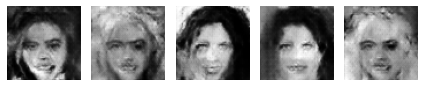

4/4 [==============================] - 0s 2ms/step
epoch: 56
1/1 [==============================] - 0s 17ms/step


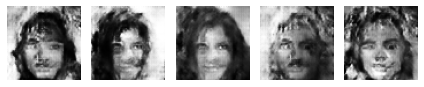

4/4 [==============================] - 0s 3ms/step
epoch: 57
1/1 [==============================] - 0s 16ms/step


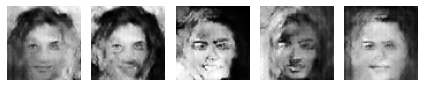

4/4 [==============================] - 0s 2ms/step
epoch: 58
1/1 [==============================] - 0s 17ms/step


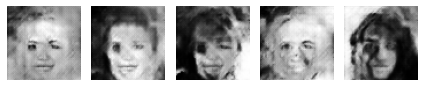

4/4 [==============================] - 0s 3ms/step
epoch: 59
1/1 [==============================] - 0s 17ms/step


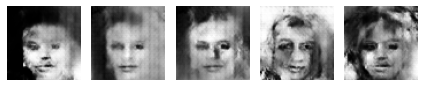

4/4 [==============================] - 0s 2ms/step
epoch: 60
1/1 [==============================] - 0s 19ms/step


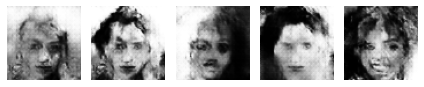

4/4 [==============================] - 0s 3ms/step
epoch: 61
1/1 [==============================] - 0s 17ms/step


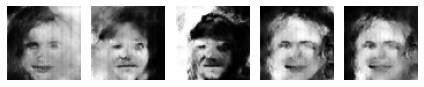

4/4 [==============================] - 0s 3ms/step
epoch: 62
1/1 [==============================] - 0s 16ms/step


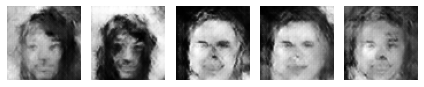

4/4 [==============================] - 0s 3ms/step
epoch: 63
1/1 [==============================] - 0s 17ms/step


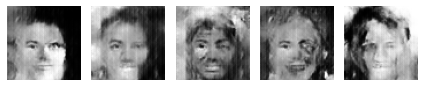

4/4 [==============================] - 0s 2ms/step
epoch: 64
1/1 [==============================] - 0s 18ms/step


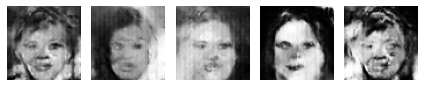

4/4 [==============================] - 0s 3ms/step
epoch: 65
1/1 [==============================] - 0s 18ms/step


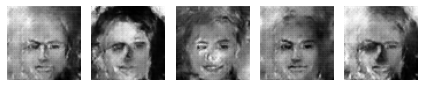

4/4 [==============================] - 0s 2ms/step
epoch: 66
1/1 [==============================] - 0s 17ms/step


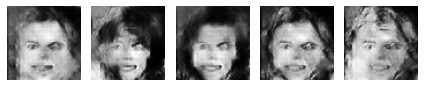

4/4 [==============================] - 0s 2ms/step
epoch: 67
1/1 [==============================] - 0s 18ms/step


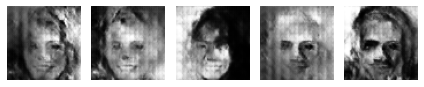

4/4 [==============================] - 0s 3ms/step
epoch: 68
1/1 [==============================] - 0s 19ms/step


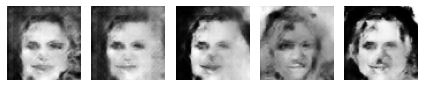

4/4 [==============================] - 0s 3ms/step
epoch: 69
1/1 [==============================] - 0s 19ms/step


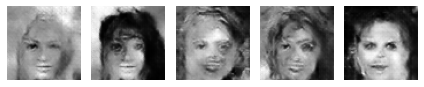

4/4 [==============================] - 0s 2ms/step
epoch: 70
1/1 [==============================] - 0s 19ms/step


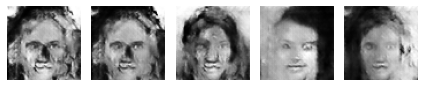

4/4 [==============================] - 0s 3ms/step
epoch: 71
1/1 [==============================] - 0s 22ms/step


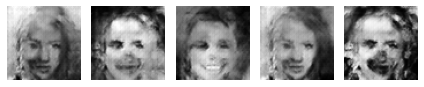

4/4 [==============================] - 0s 3ms/step
epoch: 72
1/1 [==============================] - 0s 19ms/step


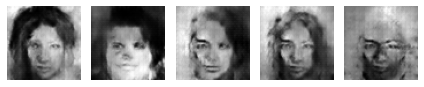

4/4 [==============================] - 0s 2ms/step
epoch: 73
1/1 [==============================] - 0s 20ms/step


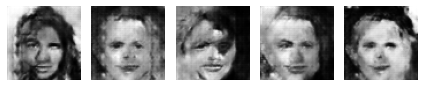

4/4 [==============================] - 0s 3ms/step
epoch: 74
1/1 [==============================] - 0s 18ms/step


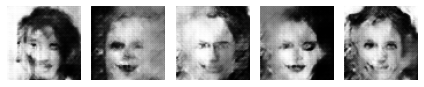

4/4 [==============================] - 0s 2ms/step
epoch: 75
1/1 [==============================] - 0s 17ms/step


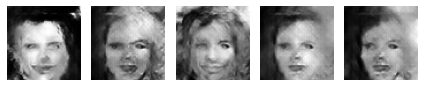

4/4 [==============================] - 0s 2ms/step
epoch: 76
1/1 [==============================] - 0s 17ms/step


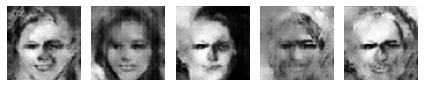

4/4 [==============================] - 0s 3ms/step
epoch: 77
1/1 [==============================] - 0s 18ms/step


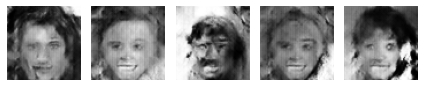

4/4 [==============================] - 0s 2ms/step
epoch: 78
1/1 [==============================] - 0s 18ms/step


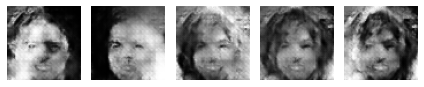

4/4 [==============================] - 0s 3ms/step
epoch: 79
1/1 [==============================] - 0s 17ms/step


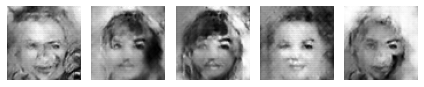

4/4 [==============================] - 0s 2ms/step
epoch: 80
1/1 [==============================] - 0s 17ms/step


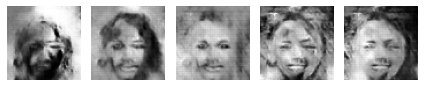

4/4 [==============================] - 0s 2ms/step
epoch: 81
1/1 [==============================] - 0s 18ms/step


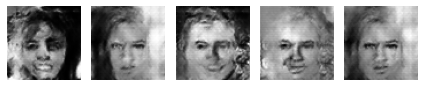

4/4 [==============================] - 0s 2ms/step
epoch: 82
1/1 [==============================] - 0s 17ms/step


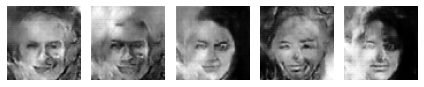

4/4 [==============================] - 0s 3ms/step
epoch: 83
1/1 [==============================] - 0s 17ms/step


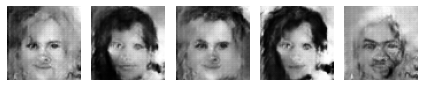

4/4 [==============================] - 0s 3ms/step
epoch: 84
1/1 [==============================] - 0s 17ms/step


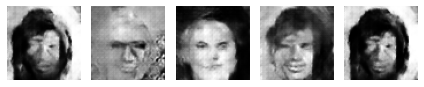

4/4 [==============================] - 0s 3ms/step
epoch: 85
1/1 [==============================] - 0s 17ms/step


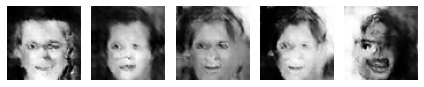

4/4 [==============================] - 0s 2ms/step
epoch: 86
1/1 [==============================] - 0s 17ms/step


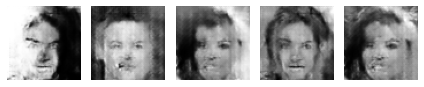

4/4 [==============================] - 0s 2ms/step
epoch: 87
1/1 [==============================] - 0s 22ms/step


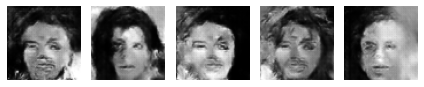

4/4 [==============================] - 0s 3ms/step
epoch: 88
1/1 [==============================] - 0s 19ms/step


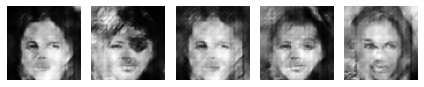

4/4 [==============================] - 0s 3ms/step
epoch: 89
1/1 [==============================] - 0s 17ms/step


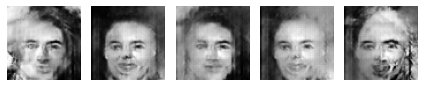

4/4 [==============================] - 0s 2ms/step
epoch: 90
1/1 [==============================] - 0s 19ms/step


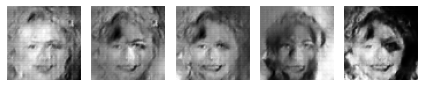

4/4 [==============================] - 0s 2ms/step
epoch: 91
1/1 [==============================] - 0s 18ms/step


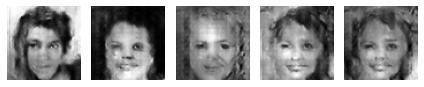

4/4 [==============================] - 0s 2ms/step
epoch: 92
1/1 [==============================] - 0s 17ms/step


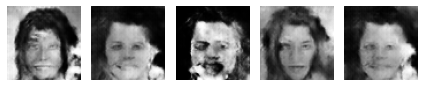

4/4 [==============================] - 0s 2ms/step
epoch: 93
1/1 [==============================] - 0s 17ms/step


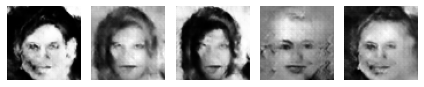

4/4 [==============================] - 0s 2ms/step
epoch: 94
1/1 [==============================] - 0s 17ms/step


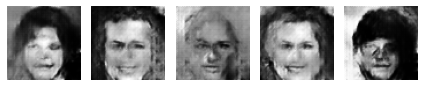

4/4 [==============================] - 0s 3ms/step
epoch: 95
1/1 [==============================] - 0s 17ms/step


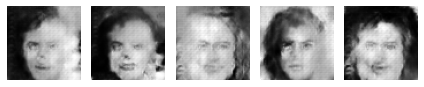

4/4 [==============================] - 0s 2ms/step
epoch: 96
1/1 [==============================] - 0s 18ms/step


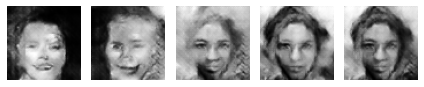

4/4 [==============================] - 0s 3ms/step
epoch: 97
1/1 [==============================] - 0s 19ms/step


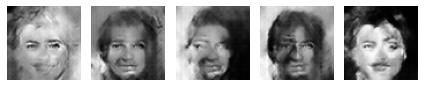

4/4 [==============================] - 0s 3ms/step
epoch: 98
1/1 [==============================] - 0s 17ms/step


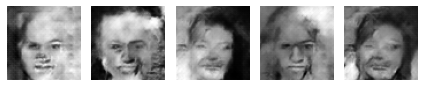

4/4 [==============================] - 0s 2ms/step
epoch: 99
1/1 [==============================] - 0s 16ms/step


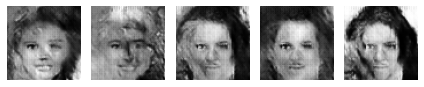

4/4 [==============================] - 0s 3ms/step


In [ ]:
X = images 

def predict_pic(): 
  랜덤숫자 = np.random.uniform(-1,1,size=(5,100))
  예측 = generator.predict(랜덤숫자)

  for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(예측[i].reshape(64,64), cmap='gray')
    plt.axis('off')
  plt.tight_layout()
  plt.show()

# train discriminator
for j in range(100):
  print(f'epoch: {j}')
  predict_pic()

  for i in range(0, len(X), 128):
    if (i +128 >= len(X) ): break
    real_x = X[i: i+128]
    real_y = np.ones(shape=(128,1))
    random_x = np.random.uniform(-1, 1, size=(128,100))
    random_x = generator.predict(random_x)
    random_y = np.zeros(shape=(128,1))

    x = np.vstack((real_x, random_x))
    y = np.vstack((real_y, random_y))
    discriminator.train_on_batch(x, y)

    noise = np.random.uniform(-1,1,size=(128,100))
    Y = np.ones(shape=(128,1))
    GAN.train_on_batch(noise, Y)


1/1 [==============================] - 0s 19ms/step


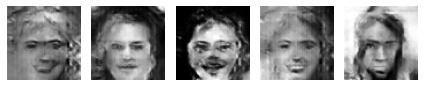

In [ ]:
predict_pic()

In [ ]:
+
